# IMPORT LIBS 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import torch
torch.__version__

'1.4.0'

In [ ]:
!pip install torch==1.4.0

In [ ]:
import torch.nn as nn 

# INCLUIDO DATASET

In [ ]:
np.random.seed(123)

In [ ]:
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv("/content/entradas_breast.csv")
classe = pd.read_csv("/content/saidas_breast.csv")

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
previsores.shape

(569, 30)

In [ ]:
np.unique(classe)

array([0, 1])

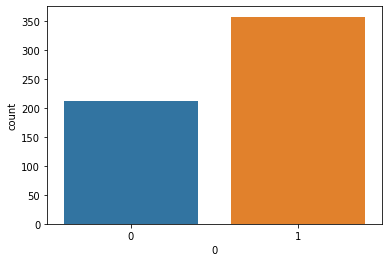

In [ ]:
sns.countplot(classe['0']);

In [ ]:
# divisãão trainamento e test 


In [ ]:
previsores_train, previsores_test, classe_train, classe_test = train_test_split(previsores,
                                                                                classe,
                                                                                test_size=0.25)

In [ ]:
previsores_train.shape

(426, 30)

In [ ]:
classe_train.shape

(426, 1)

In [ ]:
classe_train.shape

(426, 1)

In [ ]:
previsores_test.shape

(143, 30)

In [ ]:
classe_test.shape

(143, 1)

In [ ]:
# Transformaçãão dos dados para tensorespe

In [ ]:
type(previsores_train)

pandas.core.frame.DataFrame

In [ ]:
previsores_train = torch.tensor(np.array(previsores_train),dtype=torch.float)
classe_train = torch.tensor(np.array(classe_train), dtype=float) 


In [ ]:
type(previsores_train)

torch.Tensor

In [ ]:
type(classe_train)

torch.Tensor

In [ ]:
# criando dataset - juntando previsores_train + classe_train

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_train, classe_train)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
# Mini - batch iterações - para ajustar os pesos 
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

# Construção do Modelo

In [ ]:
# 30 neuronios camada de entrada = por que temoass 30 colunas de caracteristicas do previsores.shape

In [ ]:
# camadas ocultas 16 neuronios -> 16 neuronios -> 1 saida

In [ ]:
# (entrada + saida) / 2 = (30 + 1) / 2 = 16

In [ ]:
clf = nn.Sequential(
    nn.Linear(in_features=30, out_features=16), # camada tipo densa os 30 neu ronios ligam na camada primaria
    nn.ReLU(), # CAMADA DE ATIVACAO
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
)

In [ ]:
clf.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
# Criando Funcao de Erro

In [ ]:
criterio = nn.BCELoss()

In [ ]:
otimizador = torch.optim.Adam(clf.parameters(), lr=0.001, weight_decay=0.0001)

# Training Model 

In [ ]:
for epoch in range(100):
  running_loss = 0.
  for data in train_loader:
    inputs, labels = data 

    otimizador.zero_grad()

    outputs = clf(inputs)
    #print(type(labels))
    #print(outputs)
    loss = criterio(outputs, labels.float())
    #print(loss)
    loss.backward()

    otimizador.step()

    running_loss += loss.item()

  print("Epoca %3d: perda: %.5f" % (epoch+1, running_loss / len(train_loader)))
  

Epoca   1: perda: 4.67766
Epoca   2: perda: 4.21959
Epoca   3: perda: 0.90396
Epoca   4: perda: 0.79957
Epoca   5: perda: 0.69469
Epoca   6: perda: 0.47633
Epoca   7: perda: 0.39199
Epoca   8: perda: 0.36735
Epoca   9: perda: 0.36717
Epoca  10: perda: 0.34331
Epoca  11: perda: 0.34520
Epoca  12: perda: 0.30151
Epoca  13: perda: 0.29856
Epoca  14: perda: 0.29430
Epoca  15: perda: 0.31687
Epoca  16: perda: 0.27297
Epoca  17: perda: 0.29112
Epoca  18: perda: 0.29884
Epoca  19: perda: 0.26657
Epoca  20: perda: 0.26842
Epoca  21: perda: 0.35753
Epoca  22: perda: 0.26283
Epoca  23: perda: 0.24287
Epoca  24: perda: 0.22657
Epoca  25: perda: 0.26343
Epoca  26: perda: 0.24316
Epoca  27: perda: 0.21464
Epoca  28: perda: 0.22009
Epoca  29: perda: 0.21598
Epoca  30: perda: 0.23237
Epoca  31: perda: 0.20116
Epoca  32: perda: 0.21488
Epoca  33: perda: 0.17758
Epoca  34: perda: 0.25330
Epoca  35: perda: 0.18984
Epoca  36: perda: 0.19328
Epoca  37: perda: 0.25022
Epoca  38: perda: 0.18981
Epoca  39: p

## Visualizar os Pesos Gerados

In [ ]:
params = list(clf.parameters())

In [ ]:
params

[Parameter containing:
 tensor([[-7.3099e-02,  3.2508e-02, -1.0077e-01,  4.1542e-02, -1.5112e-01,
           9.3394e-02, -1.3462e-01, -1.4195e-01, -2.2300e-01,  1.2692e-01,
          -6.4502e-02,  4.0595e-02, -1.2715e-01, -1.5483e-01, -7.0470e-03,
          -2.1257e-02, -2.3147e-01,  9.0478e-02, -3.1093e-01, -4.7845e-03,
           1.3152e-01,  5.3378e-02,  2.3946e-02,  1.3277e-01,  5.6602e-01,
           7.2039e-02, -2.2418e-01,  3.7233e-02,  3.3794e-01, -5.7262e-02],
         [ 1.8980e-01,  2.0786e-01,  2.7955e-01,  9.5497e-02, -1.3875e-01,
          -1.1773e-01, -9.9748e-02, -7.7605e-02,  1.7262e-02,  3.0543e-01,
          -3.2964e-02, -1.1356e-01, -5.9616e-03,  1.7653e-01, -1.9988e-03,
          -7.4942e-02, -3.7475e-02,  1.7834e-01,  2.2333e-01, -1.2201e-02,
           8.9084e-02,  6.9207e-02,  1.8391e-01,  1.3413e-02, -3.0889e-03,
          -2.2502e-01, -1.7023e-01,  9.6785e-02, -7.0221e-02, -1.7530e-01],
         [ 1.1357e-02,  1.5418e-02, -2.4489e-01, -1.2085e-01, -7.1887e-03,


In [ ]:
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [ ]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [ ]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [ ]:
bias1 = params[3]
bias1.shape

torch.Size([16])

# Avaliação do Modelo 

In [ ]:
clf.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
type(previsores_test)

pandas.core.frame.DataFrame

In [ ]:
previsores_test = torch.tensor(np.array(previsores_test), dtype=torch.float)

In [ ]:
type(previsores_test)

torch.Tensor

In [ ]:
predict = clf.forward(previsores_test)

In [ ]:
predict

tensor([[9.7313e-01],
        [1.0000e+00],
        [2.6672e-02],
        [8.0721e-01],
        [3.9008e-05],
        [6.5157e-01],
        [8.8227e-01],
        [9.9923e-01],
        [3.5880e-01],
        [1.1970e-01],
        [9.0122e-01],
        [8.7216e-01],
        [1.0000e+00],
        [9.7382e-01],
        [9.9977e-01],
        [5.2286e-01],
        [9.6939e-01],
        [1.0000e+00],
        [3.4145e-01],
        [9.9700e-01],
        [2.6061e-12],
        [3.9617e-03],
        [3.8081e-01],
        [1.0000e+00],
        [6.1940e-01],
        [9.9116e-04],
        [2.2899e-01],
        [9.9998e-01],
        [2.4937e-05],
        [9.8937e-01],
        [1.1592e-01],
        [9.9985e-01],
        [7.2981e-01],
        [9.0123e-01],
        [8.2356e-02],
        [9.8649e-01],
        [8.4844e-02],
        [9.9817e-01],
        [9.9638e-01],
        [1.6611e-05],
        [2.5326e-03],
        [8.5689e-01],
        [1.8602e-06],
        [2.9908e-01],
        [2.1793e-05],
        [5

In [ ]:
predict = np.array(predict > 0.5 )
print(predict)

[[ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

In [ ]:
classe_test.head()

,0
333,1
273,1
201,0
178,1
85,0


In [ ]:
taxa_acerto = accuracy_score(classe_test, predict)
print(taxa_acerto)

0.9090909090909091


In [ ]:
matriz = confusion_matrix(classe_test, predict)
print(matriz)

[[48  6]
 [ 7 82]]


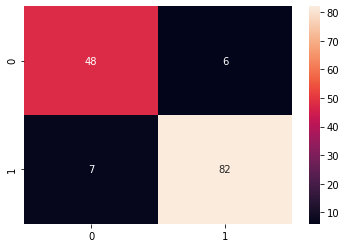

In [ ]:
sns.heatmap(matriz, annot=True);